In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import glob

In [4]:
file_path = glob.glob('/Users/sofiasavorgnano/Desktop/SignalAnalyzer/*.csv.csv')
diff = np.array([])
diffRel = np.array([])
for i in range(20):
    wave = np.loadtxt(file_path[i],skiprows=19)
    file = open(file_path[i])
    csvreader = csv.reader(file)
    header = []
    header = next(csvreader)
    rows = []
    for row in csvreader:
        rows.append(row)
    rows
    file.close()
    firstR = np.array(rows[0])
    startF = int(firstR[1])
    stopF = int(firstR[2])
    centF = int(firstR[3])

    Npoints = rows[12]
    Npoints = int(Npoints[1])
    
    # Plot of the wave data vs freq

    freqs = np.linspace(startF,stopF,Npoints)
    #plt.figure()
    #plt.plot(freqs,wave,'b-')
    #plt.grid()
    #plt.xlabel('frequency [GHz]')
    #plt.ylabel('intensity [dBm]')
    
    # Isolating the peak

    max_y = max(wave)  # Find the maximum y value
    max_x = freqs[wave.argmax()]  # Find the x value corresponding to the maximum y value
    #print(max_x, max_y)
    xMin = max_x-100000
    xMax = max_x+100000
    freqN = np.linspace(xMin,xMax,Npoints)
    yNew = np.interp(freqN,freqs,wave)
    newMaxY = np.max(yNew)
    newMaxX = freqN[yNew.argmax()]
    print(newMaxX,centF)
    #plt.figure()
    #plt.plot(freqs,wave,'b-')
    #plt.plot(freqN,yNew,'rx',markersize=1)
    #plt.grid()
    #plt.xlabel('frequency [GHz]')
    #plt.ylabel('intensity [dBm]')
    
    # Difference between central freq and data max
    
    diff = np.append(diff,centF - newMaxX)
    diffRel = np.append(diffRel, (centF-newMaxX)/newMaxX)

259999926757.8125 260000000000
269999926757.8125 270000000000
294999916992.1875 295000000000
284999921875.0 285000000000
309999916992.1875 310000000000
299999916992.1875 300000000000
234999936523.4375 235000000000
224999936523.4375 225000000000
244999931640.625 245000000000
254999931640.625 255000000000
319999912109.375 320000000000
249999931640.625 250000000000
239999931640.625 240000000000
229999936523.4375 230000000000
304999916992.1875 305000000000
314999912109.375 315000000000
279999921875.0 280000000000
289999921875.0 290000000000
274999921875.0 275000000000
264999926757.8125 265000000000


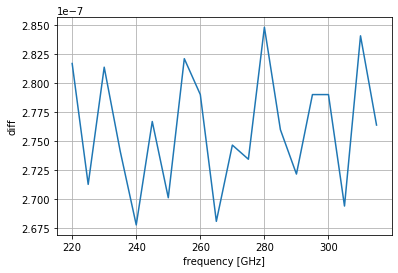

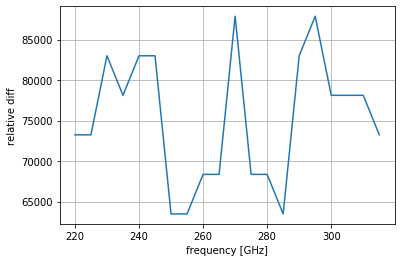

In [3]:
# Trend with frequency

bands = np.arange(220,320,5)
plt.figure()
plt.plot(bands,diffRel)
plt.xlabel('frequency [GHz]')
plt.ylabel('relative diff')
plt.grid()
plt.figure()
plt.plot(bands,diff)
plt.xlabel('frequency [GHz]')
plt.ylabel('diff')
plt.grid()